In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [84]:
hotel = pd.read_csv("hotel_bookings.csv")

In [3]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [4]:
hotel.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,4/9/2017
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,5/9/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,5/9/2017
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,6/9/2017
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,6/9/2017
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
hotel.shape

(119390, 32)

In [6]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel["reservation_status_date"] = pd.to_datetime(hotel["reservation_status_date"],
format="%d/%m/%Y")

In [10]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
hotel.drop(['agent','company'], axis=1, inplace=True, errors='ignore')

In [12]:
hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [13]:
hotel.dropna(inplace=True)

In [14]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
for col in hotel.describe(include = "object").columns:
    print(col),
    print(hotel[col].unique()),
    print("*"*100)

hotel
['Resort Hotel' 'City Hotel']
****************************************************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
****************************************************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
****************************************************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'I

In [16]:
hotel.hotel.value_counts()

hotel
City Hotel      79302
Resort Hotel    39596
Name: count, dtype: int64

<Axes: xlabel='hotel'>

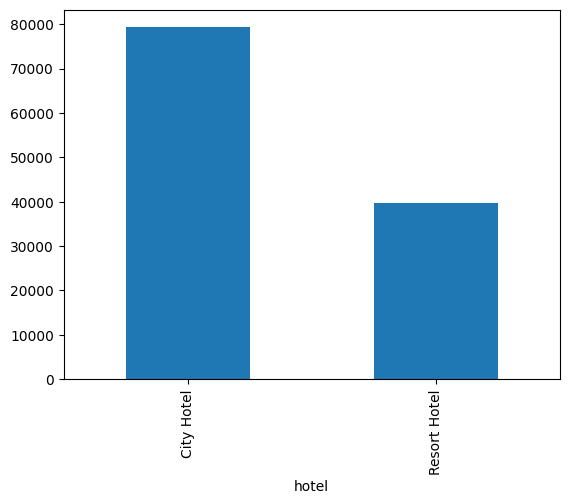

In [17]:
hotel.hotel.value_counts().plot(kind="bar")

In [18]:
hotel.customer_type.value_counts()

customer_type
Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: count, dtype: int64

<Axes: xlabel='reservation_status'>

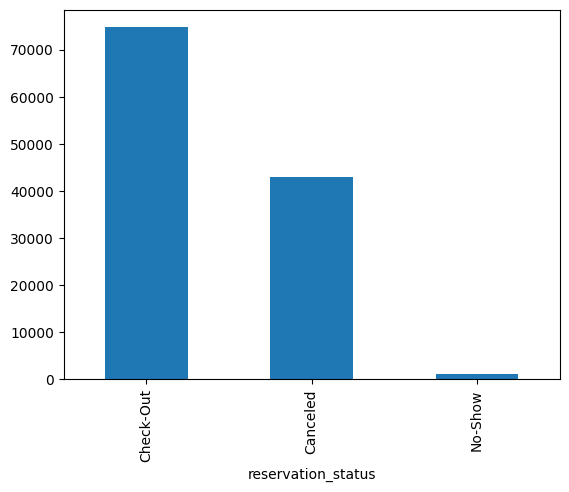

In [19]:
hotel.reservation_status.value_counts().plot(kind="bar")

In [20]:
hotel["adr"].max()

np.float64(5400.0)

In [21]:
hotel["adr"].min()

np.float64(-6.38)

<Axes: >

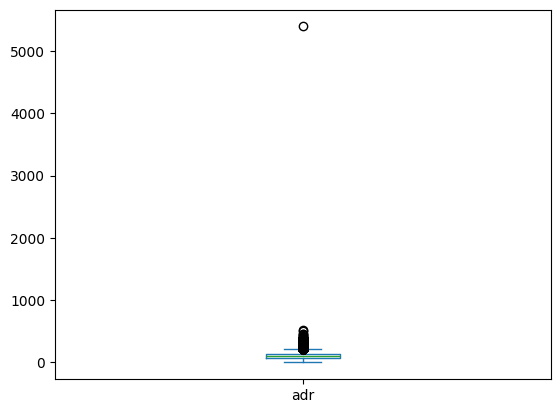

In [22]:
hotel["adr"].plot(kind = "box")

In [23]:
hotel = hotel[hotel["adr"]<5000]

<Axes: >

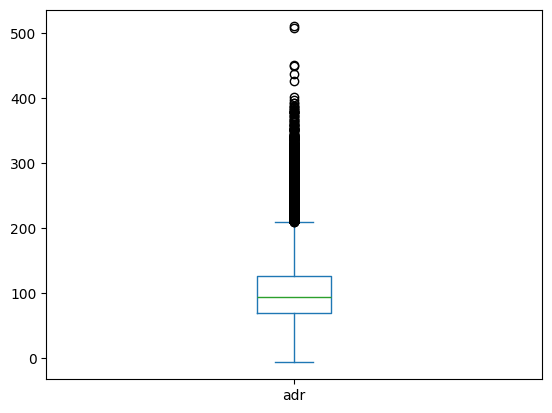

In [24]:
hotel["adr"].plot(kind = "box")

In [25]:
hotel["adr"].max()

np.float64(510.0)

In [26]:
hotel["adr"].min()

np.float64(-6.38)

In [27]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


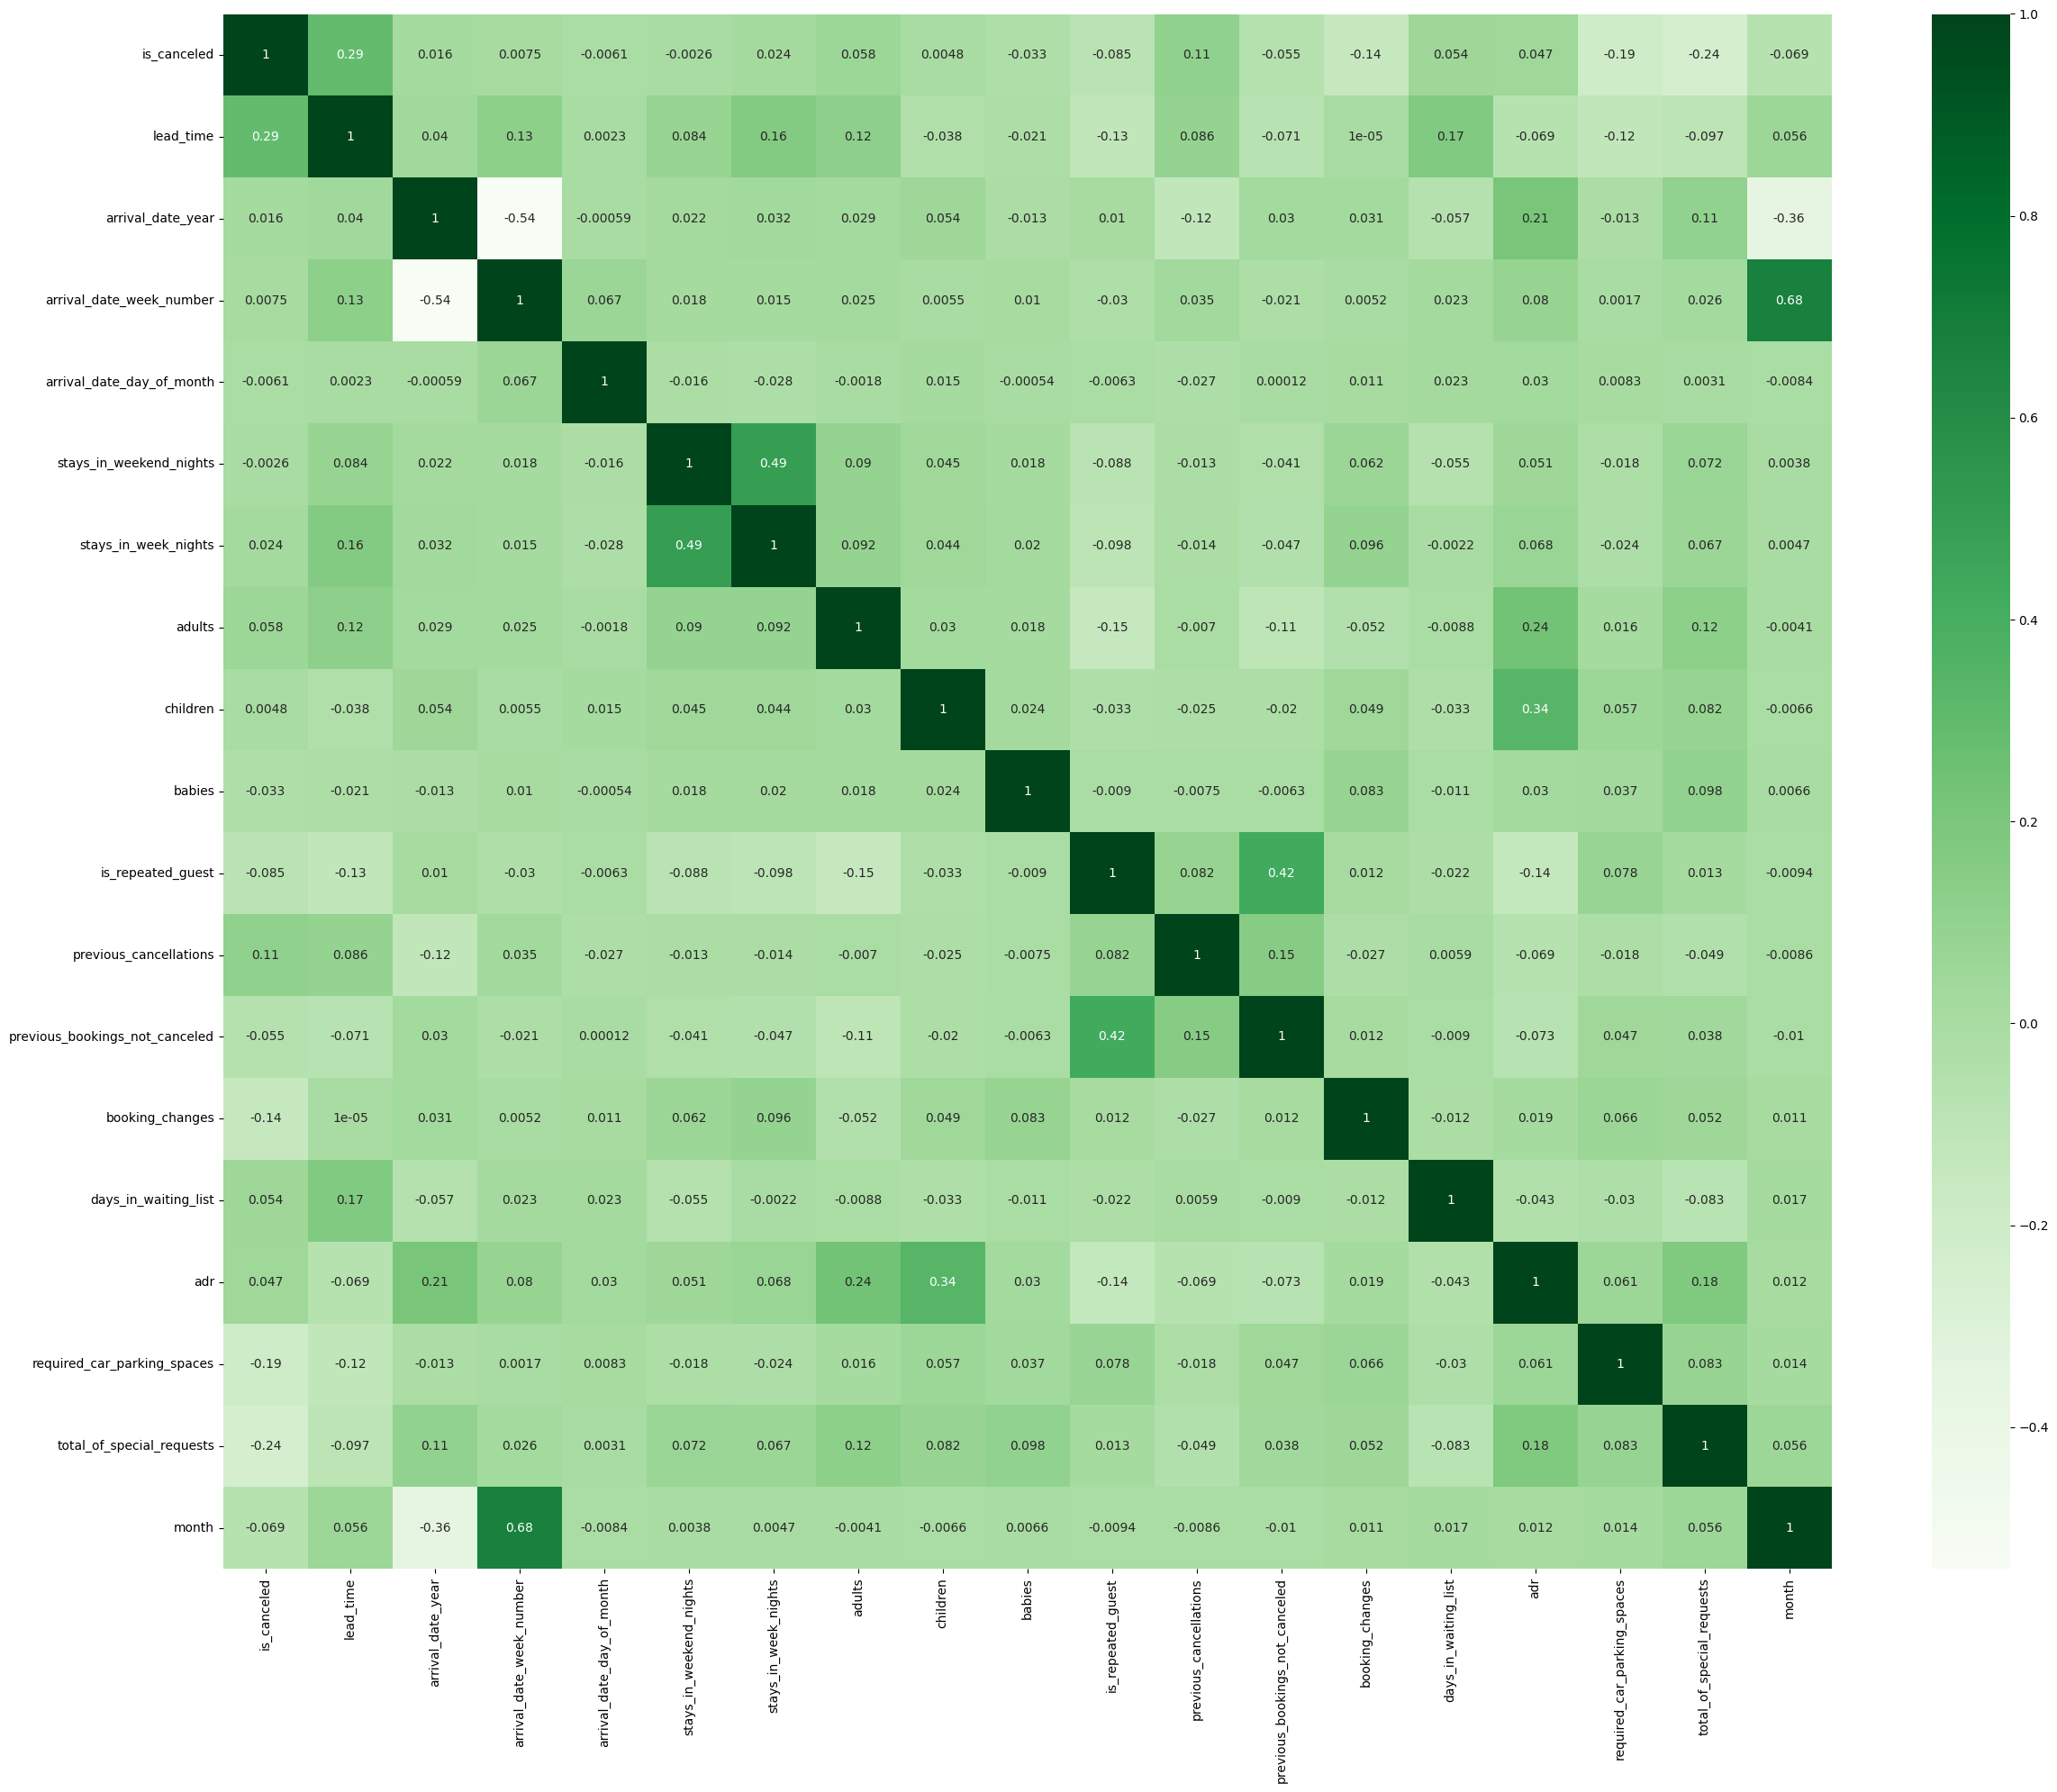

In [78]:
num_df = hotel.select_dtypes(include="number")
plt.figure(figsize=(25,20))
sns.heatmap(num_df.corr(),annot=True, cmap="Greens")
plt.tight_layout()
plt.show()

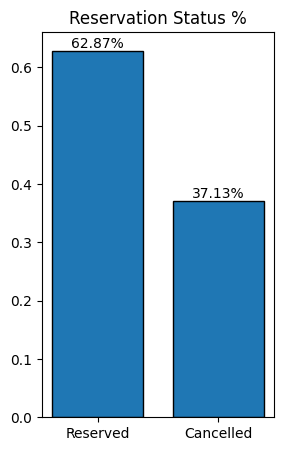

In [29]:
cancelled_pct = hotel["is_canceled"].value_counts(normalize=True)
plt.figure(figsize=(3,5))
plt.title("Reservation Status %")
barplot = plt.bar(["Reserved","Cancelled"],cancelled_pct, edgecolor="k", width=0.75)
plt.bar_label(barplot, fmt="{:.2%}")
plt.show()

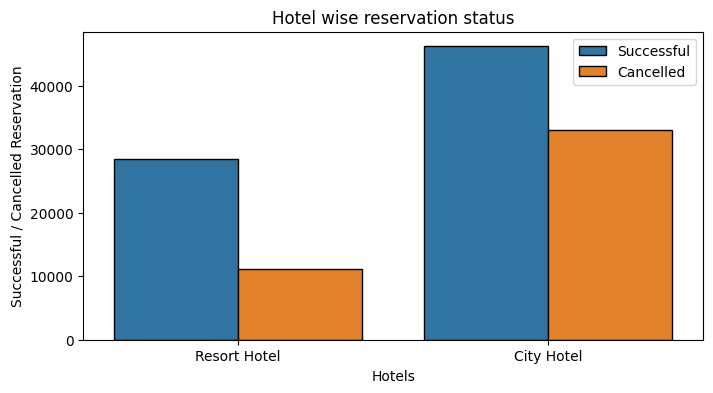

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x="hotel",data= hotel, hue= "is_canceled", edgecolor="black")
plt.title("Hotel wise reservation status")
plt.xlabel("Hotels")
plt.ylabel("Successful / Cancelled Reservation")
plt.legend(["Successful","Cancelled"])
plt.show()

In [31]:
resort_hotel = hotel[hotel["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize= True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [32]:
city_hotel = hotel[hotel["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize= True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [33]:
resort_hotel_adr_mean = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
resort_hotel_adr_mean

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [34]:
city_hotel_adr_mean = city_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel_adr_mean

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


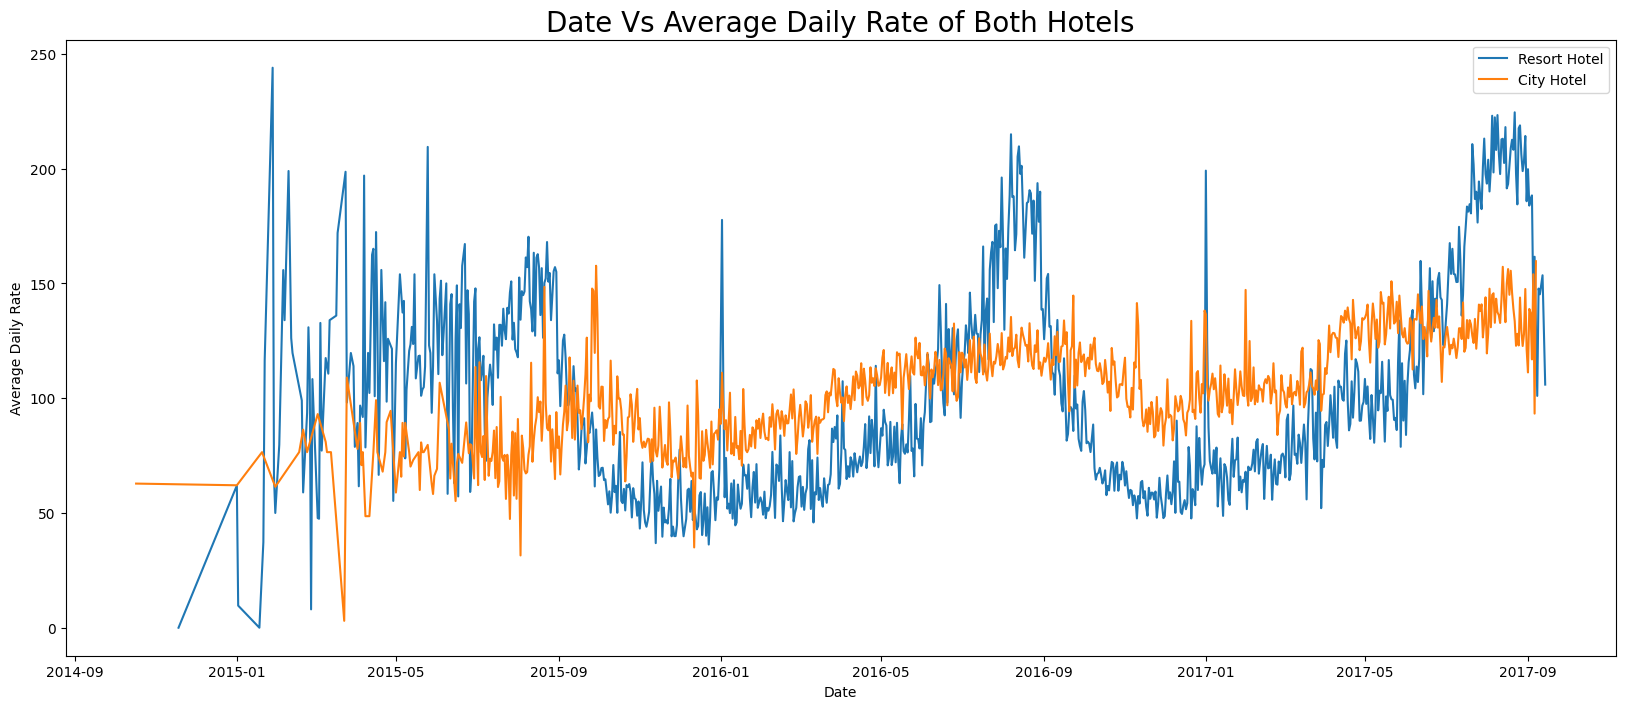

In [35]:
plt.figure(figsize=(20,8))
plt.title("Date Vs Average Daily Rate of Both Hotels", fontsize = 20)
plt.plot(resort_hotel_adr_mean.index, resort_hotel_adr_mean["adr"], label= "Resort Hotel")
plt.plot(city_hotel_adr_mean.index, city_hotel_adr_mean["adr"], label= "City Hotel")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate")
plt.legend()
plt.show()

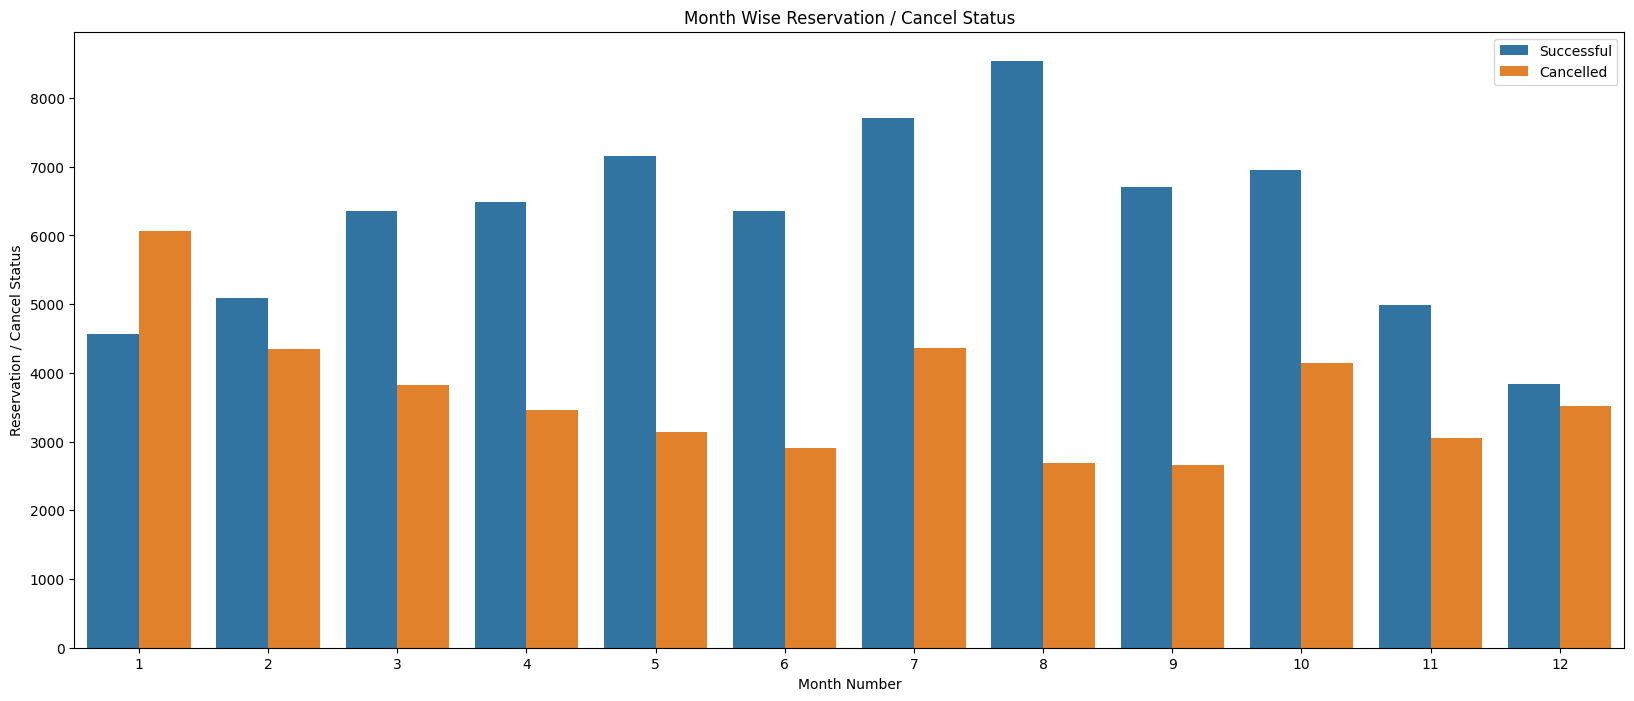

In [36]:
hotel["month"] = hotel["reservation_status_date"].dt.month
plt.figure(figsize=(20,8))
sns.countplot(x="month",data=hotel,hue="is_canceled")
plt.title("Month Wise Reservation / Cancel Status")
plt.xlabel("Month Number")
plt.ylabel("Reservation / Cancel Status")
plt.legend(["Successful","Cancelled"])
plt.show()

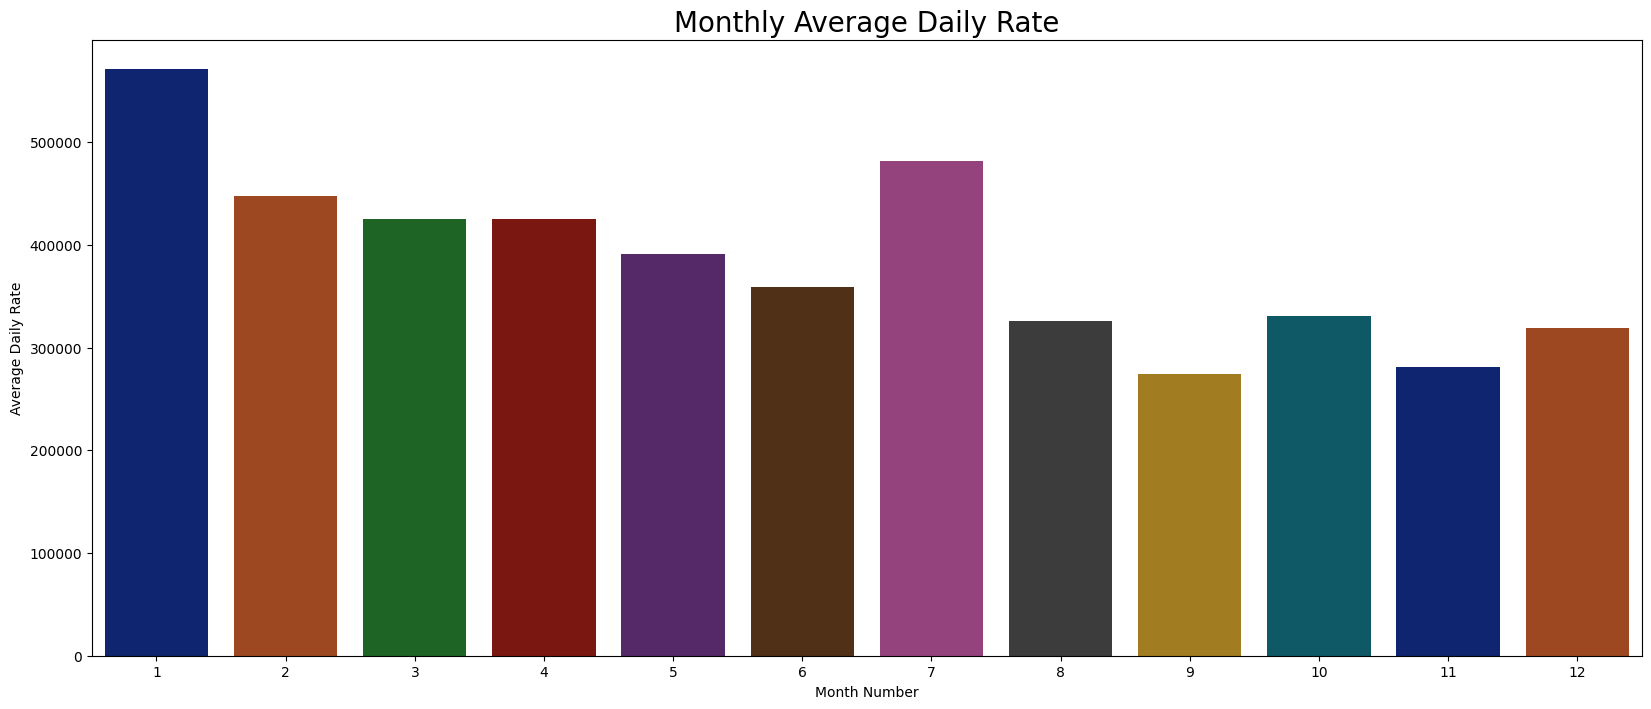

In [37]:
monthly_adr = hotel[hotel["is_canceled"]==1].groupby(hotel["month"])[["adr"]].sum()
plt.figure(figsize=(20,8))
plt.title("Monthly Average Daily Rate", fontsize=20)
sns.barplot(x="month",y="adr",data=monthly_adr,palette="dark")
plt.xlabel("Month Number")
plt.ylabel("Average Daily Rate")
plt.show()

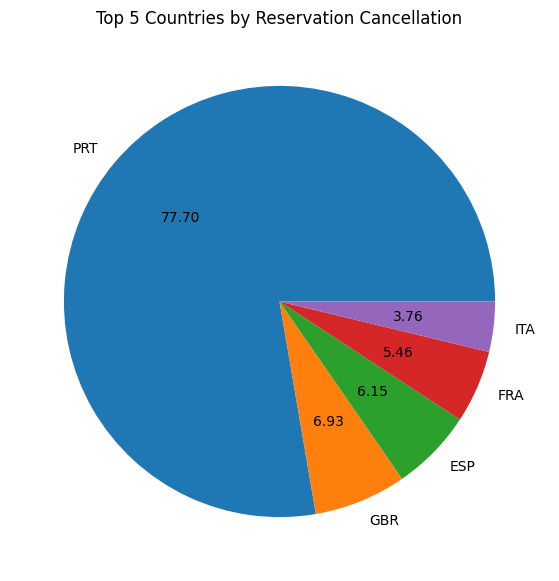

In [38]:
cancelled_data= hotel[hotel["is_canceled"]==1]
top_five_country=cancelled_data.country.value_counts()[:5]
plt.figure(figsize=(8,7))
plt.title("Top 5 Countries by Reservation Cancellation")
plt.pie(x=top_five_country,autopct="%0.2f",labels=top_five_country.index)
plt.show()

In [39]:
hotel["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [40]:
hotel["market_segment"].value_counts(normalize=True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [41]:
cancelled_data["market_segment"].value_counts(normalize=True)*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

In [42]:
cancelled_data_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_data_adr.reset_index(inplace= True)
cancelled_data_adr.sort_values("reservation_status_date",inplace = True)

not_cancelled_data = hotel[hotel["is_canceled"]==0]
not_cancelled_data_adr = not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_data_adr.reset_index(inplace= True)
not_cancelled_data_adr.sort_values("reservation_status_date",inplace = True)

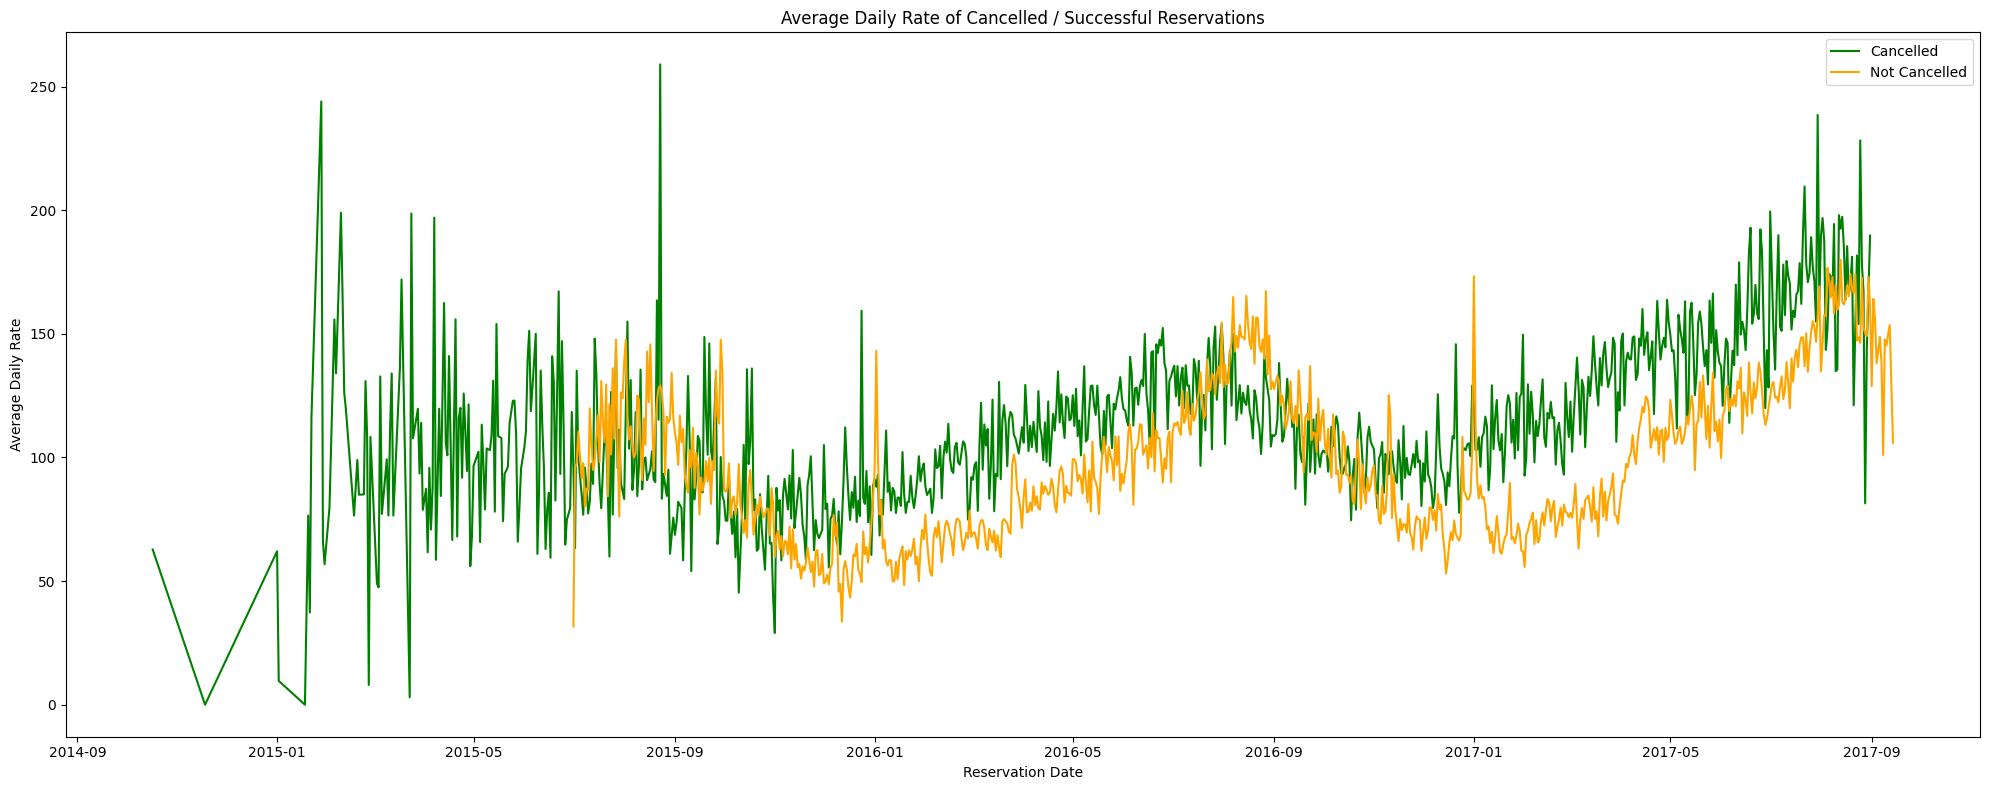

In [75]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate of Cancelled / Successful Reservations")
plt.plot(cancelled_data_adr["reservation_status_date"], cancelled_data_adr["adr"],color="green")
plt.plot(not_cancelled_data_adr["reservation_status_date"], not_cancelled_data_adr["adr"],color="orange")
plt.xlabel("Reservation Date")
plt.ylabel("Average Daily Rate")
plt.legend(["Cancelled","Not Cancelled"])
plt.tight_layout()
plt.show()

In [85]:
cancelled_adr= hotel[hotel["is_canceled"]==1]["adr"]
not_cancelled_adr= hotel[hotel["is_canceled"]==0]["adr"]
t_stat, p_val = ttest_ind(cancelled_adr,not_cancelled_adr,equal_var= False)
print(f"T Statistics: {t_stat:.2f}")
print(f"P Value: {p_val:.2e}")
print(f"Average ADR (Cancelled): {cancelled_adr.mean():.2f}")
print(f"Average ADR (Successful): {not_cancelled_adr.mean():.2f}")

T Statistics: 16.17
P Value: 9.76e-59
Average ADR (Cancelled): 104.96
Average ADR (Successful): 99.99


In [47]:
cancelled_lead_time= hotel[hotel["is_canceled"]==1]["lead_time"]
not_cancelled_lead_time= hotel[hotel["is_canceled"]==0]["lead_time"]
t_stat, p_val = ttest_ind(cancelled_lead_time,not_cancelled_lead_time,equal_var= False)
print(f"T Statistics: {t_stat:.2f}")
print(f"P Value: {p_val:.2e}")
print(f"Average ADR (Cancelled): {cancelled_lead_time.mean():.2f}")
print(f"Average ADR (Successful): {not_cancelled_lead_time.mean():.2f}")

T Statistics: 98.52
P Value: 0.00e+00
Average ADR (Cancelled): 144.93
Average ADR (Successful): 80.32


In [58]:
cancelled_segment = hotel[hotel["is_canceled"]==1]["market_segment"].value_counts(normalize= True)*100
print(cancelled_segment)

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64


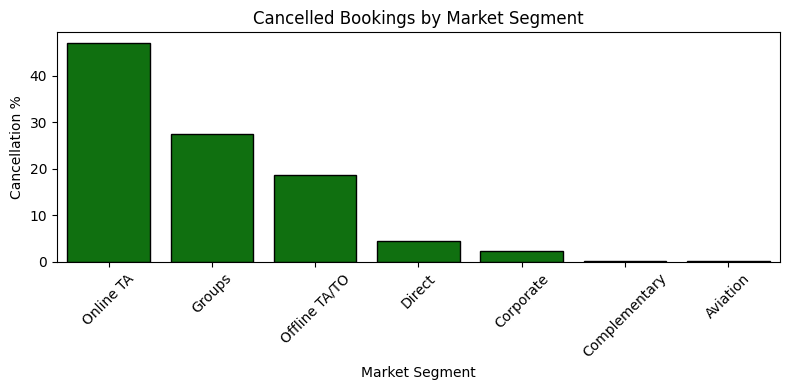

In [80]:
plt.figure(figsize=(8,4))
plt.title("Cancelled Bookings by Market Segment")
sns.barplot(cancelled_segment,color="green", edgecolor="black")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()